In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import Configure_Dataset 
df, y1, y2 = Configure_Dataset.configure('Competition1_raw_data.xlsx')
df.head(10)


,C1,C2,C4,C7,%_long_sentences,%_long_words,%_positive_words,%_negative_words,%_uncertain_words,C3',C5',C6',one_hot_Manufacturing,one_hot_Other,one_hot_Public Services
0,122.0,1.0,0.029074,51.345,0.640426,0.054250,0.004875,0.009199,0.010929,1,3.864345,11.111111,1,0,0
1,259.0,0.0,-0.013352,25.936,0.644753,0.051395,0.003258,0.011105,0.010876,0,12.028832,0.000000,1,0,0
2,90.0,1.0,0.020715,7.378,0.636816,0.061764,0.011593,0.006271,0.011403,0,3.369134,0.000000,1,0,0
3,209.0,1.0,0.020023,8.526,0.539634,0.061630,0.009686,0.007144,0.013319,0,3.299697,0.000000,1,0,0
4,80.0,1.0,-0.034895,632.298,0.587413,0.048550,0.004518,0.010047,0.011261,1,3.726269,5.000000,0,0,1
5,94.0,1.0,-0.057556,197.591,0.643137,0.045280,0.003445,0.005334,0.010056,1,5.724394,0.000000,0,0,1
6,128.0,1.0,0.004106,5.146,0.765657,0.044295,0.005204,0.006727,0.008567,0,3.463095,0.000000,1,0,0
7,91.0,0.0,0.040620,NaN,0.826347,NaN,0.004899,0.010689,0.010868,0,2.421469,0.000000,1,0,0
8,100.0,1.0,-0.029316,279.600,0.540323,0.061905,0.003915,0.008371,0.015797,0,4.816591,0.000000,0,0,1
9,106.0,1.0,-0.024925,494.008,0.514286,0.050252,0.008868,0.009853,0.016094,1,3.056608,0.000000,1,0,0


In [2]:
df.describe()

,C1,C2,C4,C7,%_long_sentences,%_long_words,%_positive_words,%_negative_words,%_uncertain_words,C3',C5',C6',one_hot_Manufacturing,one_hot_Other,one_hot_Public Services
count,660.000000,660.000000,660.000000,600.000000,660.000000,657.000000,657.000000,658.000000,658.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,149.728788,0.859091,0.007282,506.948305,0.626720,0.052143,0.005311,0.009029,0.011495,0.477273,4.417255,5.404645,0.498485,0.107576,0.393939
std,152.817467,0.348192,0.033318,1661.058320,0.077686,0.006805,0.001743,0.002957,0.002820,0.499862,5.133537,10.877569,0.500377,0.310079,0.488992
min,10.000000,0.000000,-0.162352,0.074000,0.000000,0.031595,0.001602,0.002152,0.005326,0.000000,0.283223,0.000000,0.000000,0.000000,0.000000
25%,85.000000,1.000000,-0.013927,37.883000,0.580329,0.047555,0.004134,0.006963,0.009577,0.000000,2.850622,0.000000,0.000000,0.000000,0.000000
50%,107.000000,1.000000,0.009125,107.462000,0.628861,0.051924,0.005021,0.008564,0.011294,0.000000,3.731035,0.000000,0.000000,0.000000,0.000000
75%,155.250000,1.000000,0.031571,332.505500,0.674461,0.056455,0.006254,0.010503,0.012842,1.000000,4.857904,7.692308,1.000000,0.000000,1.000000
max,2087.000000,1.000000,0.092896,30683.000000,0.826347,0.073417,0.012839,0.024605,0.029397,1.000000,99.787255,100.000000,1.000000,1.000000,1.000000


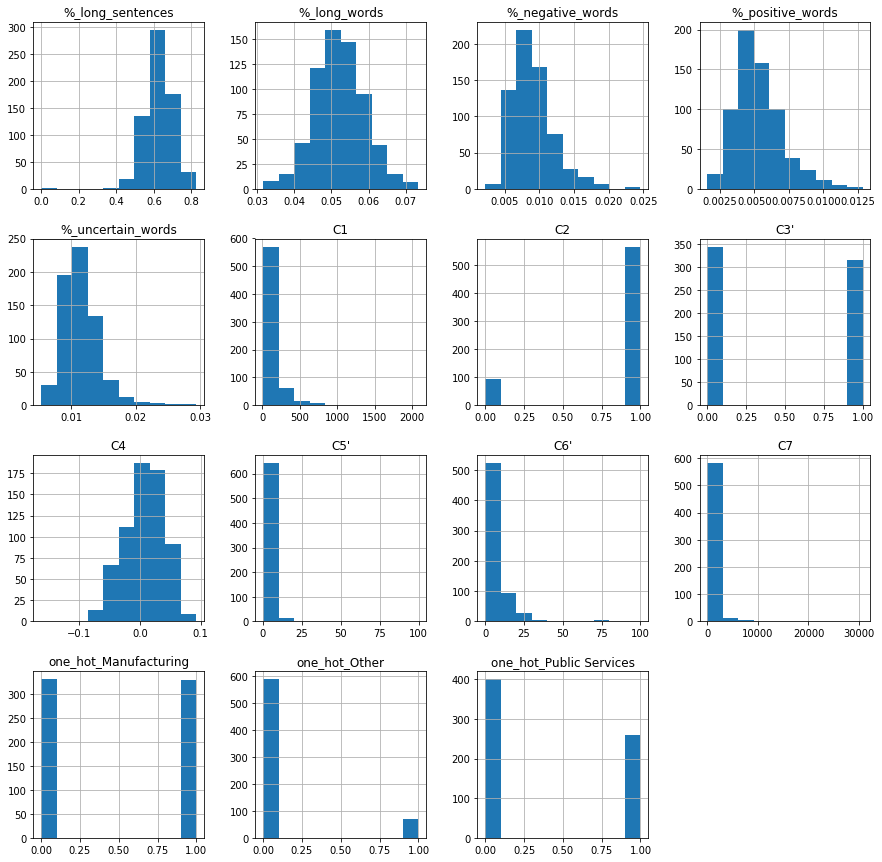

In [3]:
pd.DataFrame.hist(df, figsize = [15,15]);

In [9]:
#Outlier Treatment

def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV:
                p.append(LTV)
            elif j > UTV:
                p.append(UTV)
            else:
                p.append(j)
        df[i]=p
    return df
outlier_detect(df)

,C1,C2,C4,C7,%_long_sentences,%_long_words,%_positive_words,%_negative_words,%_uncertain_words,C3',C5',C6',one_hot_Manufacturing,one_hot_Other,one_hot_Public Services
0,122.000,1.0,0.029074,51.34500,0.640426,0.054250,0.004875,0.009199,0.010929,1,3.864345,11.111111,1,0.0,0
1,259.000,1.0,-0.013352,25.93600,0.644753,0.051395,0.003258,0.011105,0.010876,0,7.868826,0.000000,1,0.0,0
2,90.000,1.0,0.020715,7.37800,0.636816,0.061764,0.009434,0.006271,0.011403,0,3.369134,0.000000,1,0.0,0
3,209.000,1.0,0.020023,8.52600,0.539634,0.061630,0.009434,0.007144,0.013319,0,3.299697,0.000000,1,0.0,0
4,80.000,1.0,-0.034895,632.29800,0.587413,0.048550,0.004518,0.010047,0.011261,1,3.726269,5.000000,0,0.0,1
5,94.000,1.0,-0.057556,197.59100,0.643137,0.045280,0.003445,0.005334,0.010056,1,5.724394,0.000000,0,0.0,1
6,128.000,1.0,0.004106,5.14600,0.765657,0.044295,0.005204,0.006727,0.008567,0,3.463095,0.000000,1,0.0,0
7,91.000,1.0,0.040620,NaN,0.815658,NaN,0.004899,0.010689,0.010868,0,2.421469,0.000000,1,0.0,0
8,100.000,1.0,-0.029316,279.60000,0.540323,0.061905,0.003915,0.008371,0.015797,0,4.816591,0.000000,0,0.0,1
9,106.000,1.0,-0.024925,494.00800,0.514286,0.050252,0.008868,0.009853,0.016094,1,3.056608,0.000000,1,0.0,0


In [10]:
df.describe()

,C1,C2,C4,C7,%_long_sentences,%_long_words,%_positive_words,%_negative_words,%_uncertain_words,C3',C5',C6',one_hot_Manufacturing,one_hot_Other,one_hot_Public Services
count,660.000000,660.0,660.000000,600.000000,660.000000,657.000000,657.000000,658.000000,658.000000,660.000000,660.000000,660.000000,660.000000,660.0,660.000000
mean,126.911932,1.0,0.007433,233.215028,0.628160,0.052135,0.005281,0.008955,0.011406,0.477273,4.009806,4.363858,0.498485,0.0,0.393939
std,64.094744,0.0,0.032757,265.219227,0.069922,0.006728,0.001650,0.002723,0.002503,0.499862,1.647987,6.431440,0.500377,0.0,0.488992
min,10.000000,1.0,-0.082174,0.074000,0.439132,0.034204,0.001602,0.002152,0.005326,0.000000,0.283223,0.000000,0.000000,0.0,0.000000
25%,85.000000,1.0,-0.013927,37.883000,0.580329,0.047555,0.004134,0.006963,0.009577,0.000000,2.850622,0.000000,0.000000,0.0,0.000000
50%,107.000000,1.0,0.009125,107.462000,0.628861,0.051924,0.005021,0.008564,0.011294,0.000000,3.731035,0.000000,0.000000,0.0,0.000000
75%,155.250000,1.0,0.031571,332.505500,0.674461,0.056455,0.006254,0.010503,0.012842,1.000000,4.857904,7.692308,1.000000,0.0,1.000000
max,260.625000,1.0,0.092896,774.439250,0.815658,0.069805,0.009434,0.015814,0.017740,1.000000,7.868826,19.230769,1.000000,0.0,1.000000


In [ ]:
#def replace(group):
   # mean, std = group.mean(), group.std()
   # outliers = (group - mean).abs() > 3*std
   # group[outliers] = mean        # or "group[~outliers].mean()"
    #return group

#df.groupby('a').transform(replace)

In [ ]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y
normalize(df)
df.describe()

In [ ]:
def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y
sigmoid(df)
df.describe()

In [ ]:
pd.DataFrame.hist(df, figsize = [15,15]);

In [ ]:
#find out missing values
names = []
value = []
for col in df.columns:
    names.append(col)
    value.append(df[col].isnull().sum())
    print("number of missing values: ", names[-1], value[-1], """                  """, "Percentage of missing values:", names[-1], round((value[-1]/682)*100))
    


In [ ]:
import ImputeUsingBins
df = ImputeUsingBins.impute_bin_mean(df)

In [ ]:
#find out missing values
names = []
value = []
for col in df.columns:
    names.append(col)
    value.append(df[col].isnull().sum())
    print("number of missing values: ", names[-1], value[-1], """                  """, "Percentage of missing values:", names[-1], round((value[-1]/682)*100))
    


In [ ]:
import Combine
df = Combine.combine(df, y1, y2)
df.head()

In [ ]:
df.to_csv('./Datasets/w_out_IQR.csv')